In [40]:
s1=np.array([1,4,7])
s2=np.array([3,4,5])
s3=np.array([5,6,7])

In [41]:
stats.levene(s1,s2,s3)

LeveneResult(statistic=1.4545454545454544, pvalue=0.30545945991891144)

In [42]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.090909090909091, pvalue=0.3943703703703705)

In [12]:
s=30
xbar=182
n=40
stats.norm.interval(.95,xbar,s/np.sqrt(n))

(172.70307451543158, 191.29692548456842)

In [29]:
# 1. A study was carried out to understand amount of haemoglobin in blood for males and females. 
# A random sample of 160 males and 180 females have means of 13 g/dl and 15 g/dl. 
# The two population have standard deviation of 4.1 g/dl for male donors and 3.5 g/dl for female donor . 
# Can it be said the population means of concentrations of the elements are the same for men and women? 
# Use α = 0.01.Assume data is normally distributed
#h0: amount of haemoglobin in blood for males and females are same
#ha: amount of haemoglobin in blood for males and females are not same
n1=160
n2=180
x1bar=13
x2bar=15
sigma1=4.1
sigma2=3.5
sig_lvl=0.01
z=(x1bar-x2bar)/np.sqrt(((sigma1**2)/n1)+((sigma2**2)/n2))
pval= (stats.norm.sf(abs(z)))*2
if pval<sig_lvl:
    print('h0 is rejected \namount of haemoglobin in blood for males and females are not same with {:.2f} confidance  ' .format(1-sig_lvl))
else:
    print('fail to reject h0 \namount of haemoglobin in blood for males and females are same with {:.2f} confidance  ' .format(1-sig_lvl))

h0 is rejected 
amount of haemoglobin in blood for males and females are not same with 0.99 confidance  


In [27]:
df = pd.read_csv('mathscore_1ttest.csv')
df.head(1)
female_math=df['math score']
female_math.shape

(24,)

In [34]:
# 1. A survey claims that in a math test female students tend to score marks greater than 75. 
# Consider a sample of 24 female students and perform a hypothesis test to check the claim with 90% confidence.
#h0: in a math test female students tend to score marks less than equal to 75
#ha: in a math test female students tend to score marks greater than 75
mu=75
n=24
sig_lvl=0.1
xbar=np.mean(female_math)
s=np.std(female_math,ddof=1)
t=(xbar-mu)/(s/(n**0.5))
pval=stats.t.sf(t,df=n-1)
if pval<sig_lvl:
    print('ho is rejected \nin a math test female students tend to score marks greater than 75 with {:.2f} confidence '.format(1-sig_lvl))
else:
    print('fail to reject h0 \nin a math test female students tend to score marks less than equal to 75 with {:.2f} confidence ' .format(1-sig_lvl))

fail to reject h0 
in a math test female students tend to score marks less than equal to 75 with 0.90 confidence 


In [26]:
pval=(stats.ttest_1samp(female_math, popmean=75, alternative='greater'))[1]
pval

0.9992573386042322

In [33]:
xbar

66.45833333333333

In [11]:
mu=82
sigma=15
n=40
xbar=95
sig_lvl=0.05
z=(xbar-mu)/(sigma/np.sqrt(n))
pval=(stats.norm.sf(abs(z)))*2
if pval<sig_lvl:
    print('h0 is rejected \nThe average calories in a slice bread of the brand Alphas not 82 ')
else:
    print('fail to reject h0 \nThe average calories in a slice bread of the brand Alphas are 82 ')

h0 is rejected 
The average calories in a slice bread of the brand Alphas not 82 


In [9]:
n=100
xbar=35 # not need for that que
s=0.15
t=stats.norm.isf(0.05)
margin_error=t*(s/np.sqrt(n))
print(margin_error)

0.02467280440427209


In [38]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import scipy.stats as stats
from scipy.stats import skewnorm
import random
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import statsmodels.stats.multicomp as mc

<a id="var"></a>
#  Random Variable

It is defined as a variable that takes all the possible values of a random experiment.

### Example:

    Consider rolling a die as a random experiment; then the random variable (X) takes the values 1, 2, 3, 4, 5, and 6.   

<a id="rv"></a>
##  Types of Random Variable

Two types of random variables:- discrete and continuous.

`Discrete Random Variable`: A random variable that takes the finite or countably infinite number of values is called a discrete random variable. Let us study some of the examples of a discrete random variable:

        1. Number of occupied car parking spots in the amusement park
        2. Number of students selected in the exam hall
        3. Number of home delivery orders taken by a restaurant in a day
        4. Number of passengers passed through an airport's security check

`Continuous Random Variable`: A random variable that takes an infinite number of values in a range is called a continuous random variable. Let us study some of the examples of a discrete random variable:

        1. Weight of people registered for the fitness program
        2. The diameter of the water pipe produced in a factory
        3. The time between two consecutive bill payments in a supermarket
        4. Mileage of a car

# Introduction to Probability distributions:

<a id="dist"></a>
# Probability Distributions

Probability distributions are used to understand and analyze the patterns in the data. It is a mathematical function that gives the probabilities of all the outcomes of an experiment. 

There are two types of probability distributions based on the type of random variable; discrete and continuous probability distributions.

<a id="dis"></a>
##  Discrete Probability Distributions

It is the probability distribution related to the discrete random variable. In this case, the `probability mass function (pmf)` gives the probability that a variable is equal to a specific value. For a discrete random variable `X`, pmf of X is given as $ P(X = x_{i})$, where $x_{i}$ for i = 1, 2, ..., n are the values taken by the variable X.

The sum of all the probabilities is always 1. i.e. $\sum_{i = 1}^{n} P(X = x_{i}) = 1$

For a discrete random variable X with values $x_{1}, x_{2}, ..., x_{n}$ the `cumulative distribution function (cdf)` is denoted by F(x) and defined as:

<p style='text-indent:25em'> <strong> $ F(x_{i}) = P[X \leq x_{i}]$</strong> </p>

The cdf of a random variable returns the probability that the variable takes all the values less than or equal to the specific value.

## Binomial  distribution

A discrete variable X taking values 0, 1, 2,..., n follows a binomial distribution with parameters `n` and `p`, if the pmf of X is given by:

<p style='text-indent:25em'> <strong> $ P(X = x) = {n \choose x} p^{x}q^{n-x}$</strong> $\hspace{2cm}$  x = 0, 1, ..., n </p>

`p` denotes the probability of success of an experiment and `q` denotes the probability of failure. (where, p + q = 1)

If `n` independent bernoulli trials (each with `p` as probability of success) are executed then the number of successes follows a binomial distribution.

The mean and variance of the distribution is given as:<br>

Mean = $np$

Variance = $npq$ 

### Some important functions in Python for Binomial distribution:

#### 1) Probability mass function
-----------

##### scipy.stats.binom.pmf gives the probability mass function for the binomial distribution
----

binomial = scipy.stats.binom.pmf (k,n,p), 
* where k is an array and takes values in {0, 1,..., n}
* n and p are shape parameters for the binomial distribution

The output, binomial, gives probability of binomial distribution function in terms of array.

#### 2) Cumulative Distribution function
------

cumbinomial = scipy.stats.binom.cdf(k,n,p) gives cumulative binomial distribution.

The output, cumbinomial, gives cumulative probability of binomial distribution function in terms of array.



### A coin is tossed 2 times. What is the probability of getting heads?

In [ ]:
stats.binom.pmf(r,n,p)

In [3]:
# hp=p, hystorical probablity
p= 0.5
n=2

In [4]:
# no heads
r=0
stats.binom.pmf(r,n,p)

0.25

In [5]:
# one head
r=1
stats.binom.pmf(r,n,p)

0.5000000000000002

In [6]:
r=2
stats.binom.pmf(r,n,p)

0.25

In [8]:
# a dice tossed 2 times what is the probablity getting 5 in both the coins

In [9]:
n=2
p=1/6

In [ ]:
r=

### Example 1: 

##### A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected.What is the probability that 


-------------------
* a) None of the LED bulbs are defective?
------------
* b) Exactly one of the LED bulbs is defective?
---------------
* c) Two or fewer of the LED bulbs are defective?
----------
* d) Three or more of the LED bulbs are defective

#### a) None of the LED bulbs are defective?

In [15]:

n=10
p=0.05

In [16]:
# None of the LED bulbs are defective?
r=0
stats.binom.pmf(r,n,p)

0.5987369392383787

In [17]:
# Exactly one of the LED bulbs is defective?
r=1
stats.binom.pmf(r,n,p)

0.3151247048623047

#### b) Exactly one of the LED bulbs is defective?

In [18]:
r=1
stats.binom.pmf(r,n,p)

0.3151247048623047

#### c) Two or fewer of the LED bulbs are defective?

In [22]:
p=0.05
n=10
# cdf- cummilative distibution function

In [23]:
stats.binom.pmf(0,n,p)+stats.binom.pmf(1,n,p)+stats.binom.pmf(2,n,p)

0.9884964426207031

In [24]:
r=2
stats.binom.cdf(r,n,p)

0.988496442620703

#### d) Three or more of the LED bulbs are defective

In [25]:
# we want from 
# here r = 3
# cdf = (r-1)= (3-1)=2 thats we want 

In [30]:
p=0.05
n=10
r=3
1-stats.binom.cdf(r-1,n,p)

0.01150355737929687

In [32]:
# sf= survival function

In [33]:
stats.binom.sf(r-1,n,p)

0.011503557379296871

In [34]:
# pmf(r)
# cdf(r)
# sf(r-1) or 1-cdf(r-1)

#### Suppose a study performed at St. Jude’s Hospital shows that 30% of all patients arriving at the emergency room are subsequently admitted to the hospital for at least one night. Assuming that a sample of seven arrived at the emergency room each day:

#### a. What is the probability that five or more in the sample of seven will require admittance to the hospital?
#### b. What is the expected number of patients in the sample who will require admittance to the hospital?

#### c. Plot the pmf and cdf graph.


#### a. What is the probability that five or more in the sample of seven will require admittance to the hospital

In [35]:
p=0.3
n=7
r=5
stats.binom.sf(r-1,n,p)

0.02879549999999999

#### b. What is the expected number of patients in the sample who will require admittance to the hospital?

###### Note: (Expected value = Mean)

In [37]:
p=0.3
n=7
exp_val=n*p
exp_val

2.1

#### c. Plot the pmf and cdf graph.

In [40]:
# pmf
p=0.3
n=7
pmf_list=[]
for r in range (0,n+1):
    pmf_val=stats.binom.pmf(r,n,p)
    pmf_list.append(pmf_val)
pmf_list    
    

[0.08235429999999996,
 0.24706290000000003,
 0.31765230000000017,
 0.2268944999999999,
 0.09724049999999998,
 0.02500469999999998,
 0.003572099999999999,
 0.00021869999999999995]

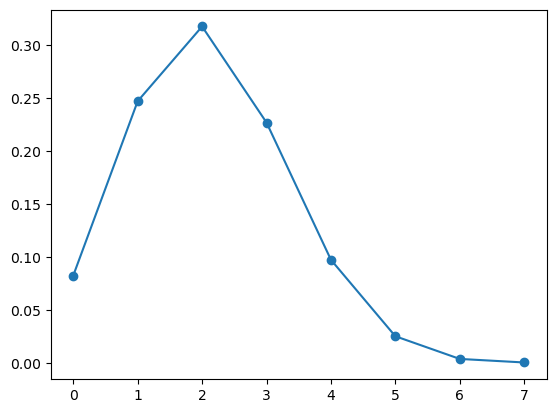

In [41]:
plt.plot(pmf_list,marker='o')
plt.show()

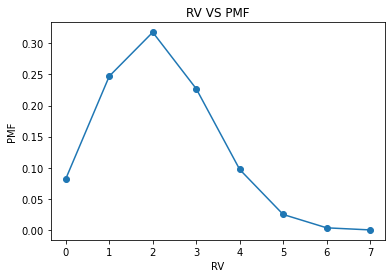

In [47]:
p=0.3
n=7
cdf_list=[]
for r in range (0,n+1):
    cdf_val=stats.binom.cdf(r,n,p)
    cdf_list.append(cdf_val)
cdf_list  
    


[0.08235429999999999,
 0.32941719999999985,
 0.6470695000000001,
 0.873964,
 0.9712045,
 0.9962092,
 0.9997813,
 1.0]

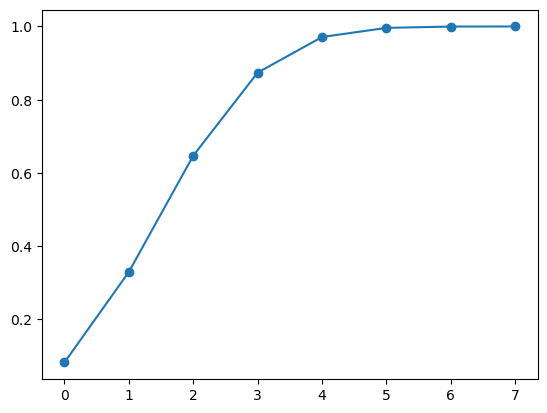

In [48]:
plt.plot(cdf_list,marker='o')
plt.show()

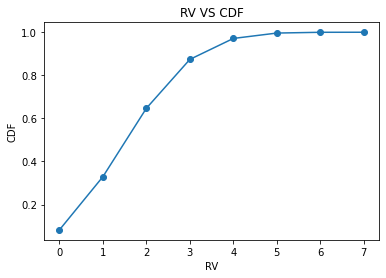

### The percentage of orders filled correctly at a softdrink store is 86.8%. Suppose you drive to the store and place an order. Two of your friends independently place  orders at the same window

1. None of the orders are filled correctly
2. Atleast 2 of the 3 orders are filled correctly.

#### None of the orders are filled correctly

In [49]:
p=0.868
n=3
r=0
stats.binom.pmf(r,n,p)

0.0022999680000000003

#### Atleast 2 of the 3 orders are filled correctly.

In [50]:
p=0.868
n=3
r=2
stats.binom.sf(r-1,n,p)

0.952327936

### Practice:

#### 1. Heaven Furnitures (HF) sells furniture like sofas, beds and tables. It is observed that 25% of their customers complain about the furniture purchased by them for many reasons. On Tuesday, 20 customers purchased furniture products from HF. 


#### a. Calculate the probability that exactly 3 customers will complain about the purchased products.
#### b. Calculate the probability that atleast 3 customers will complain about the purchased products.
#### c. Calculate the probability that atmost 3 customers will complain about the purchased products.
#### d. Calculate the probability that from 3  to 5 customers will complain about the purchased products.
#### e. Plot the pmf and cdf.

In [51]:
# a. Calculate the probability that exactly 3 customers will complain about the purchased products.

p=0.25
n=20
r=3
stats.binom.pmf(r,n,p)

0.13389561519943532

In [52]:
# b. Calculate the probability that atleast 3 customers will complain about the purchased products.

p=0.25
n=20
r=3
stats.binom.sf(r-1,n,p)

0.9087395675351218

In [ ]:
# c. Calculate the probability that atmost 3 customers will complain about the purchased products.

In [55]:
p=0.25
n=20
r=3
stats.binom.cdf(r,n,p)

0.22515604766431352

In [56]:
# d. Calculate the probability that from 3 to 5 customers will complain about the purchased products.
p=0.25
n=20
stats.binom.pmf(3,n,p)+stats.binom.pmf(4,n,p)+stats.binom.pmf(5,n,p)

0.5259122219222262

In [65]:
# or
p=0.25
n=20
stats.binom.cdf(5,n,p)-stats.binom.cdf(2,n,p)

0.5259122219222263

In [ ]:
# e. Plot the pmf and cdf.

In [61]:
p=0.25
n=20
cdf_list=[]
for r in range (0,n+1):
    cdf_val=stats.binom.cdf(r,n,p)
    cdf_list.append(cdf_val)
cdf_list  

[0.0031712119389339963,
 0.024312624865160615,
 0.09126043246487825,
 0.22515604766431352,
 0.41484150253018015,
 0.6171726543871046,
 0.7857819476012082,
 0.8981881430772773,
 0.9590748322934814,
 0.9861355830562388,
 0.9960578583359165,
 0.9990646084206674,
 0.9998162959418551,
 0.9999704882538936,
 0.9999961869725666,
 0.9999996134683897,
 0.999999970395038,
 0.9999999983892849,
 0.9999999999445208,
 0.9999999999990905,
 1.0]

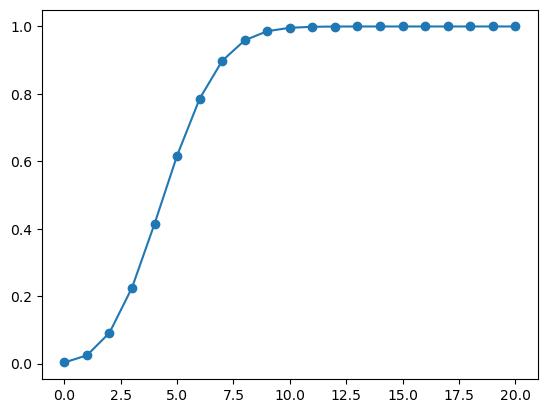

In [62]:
plt.plot(cdf_list,marker='o')
plt.show()

In [63]:
# pmf
p=0.25
n=20
pmf_list=[]
for r in range (0,n+1):
    pmf_val=stats.binom.pmf(r,n,p)
    pmf_list.append(pmf_val)
pmf_list  

[0.0031712119389339932,
 0.021141412926226615,
 0.06694780759971758,
 0.13389561519943532,
 0.18968545486586655,
 0.20233115185692432,
 0.1686092932141038,
 0.11240619547606907,
 0.06088668921620408,
 0.027060750762757397,
 0.0099222752796777,
 0.0030067500847508226,
 0.0007516875211877052,
 0.00015419231203850361,
 2.5698718673083904e-05,
 3.4264958230778554e-06,
 3.569266482372768e-07,
 2.7994246920570675e-08,
 1.555235940031706e-09,
 5.4569682106375656e-11,
 9.094947017729282e-13]

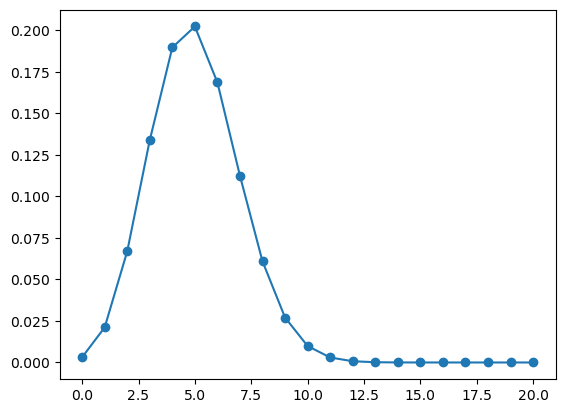

In [64]:
plt.plot(pmf_list,marker='o')
plt.show()

### The probability of manufacturing a defective pen is 5 percentage. This company is selling 50 pens in a box. What is the probability to get 2 defective pens?

In [66]:
p=0.05
n=50
r=2
stats.binom.pmf(r,n,p)

0.2611013703988195

The probability of getting 2 defective pens from a box of 50 pens is 0.2611

### What is the probability to get max of 3 pen defective ?

In [68]:
p=0.05
n=50
r=3
stats.binom.cdf(r,n,p)

0.7604079609501001

### What is the probability to get at least 3 defective pens ? (x = 3 to 50)

In [69]:
p=0.05
n=50
r=3
stats.binom.sf(r-1,n,p)

0.4594668772804849

### What is the probability to get 2 to 5 faulty pen in a pack of 50


In [71]:
p=0.05
n=50
stats.binom.cdf(5,n,p)-stats.binom.cdf(1,n,p)

0.6827920746895275

In [2]:
p=0.05
n=50
stats.binom.sf(1,n,p)-stats.binom.sf(5,n,p)

0.6827920746895275

#	Introduction to the Normal distribution:

## Normal Distribution

A continuous variable X follows a normal distribution with the parameters $\mu$ and $\sigma$ if the pdf of X is given by:

<p style='text-indent:25em'> <strong> $f(x) = \frac {1}{\sigma\sqrt(2 \pi)} e^\frac {-(x-\mu^2)}{2\sigma^2}$</strong></p>

The normal distribution is a bell-shaped symmetric distribution with `mean = median = mode`. 

The mean and variance of the distribution is given as:<br>

Mean = $\mu$ 

Variance = $\sigma^{2}$ 

**Note:** The variable Z given as, Z = $\frac{X - \mu}{\sigma}$ follows a `standard normal distribution` with mean 0 and variance 1.

Where
* f(x) is used to represent a probability density function
* x is any value of the continuous variable, where -∞ < x < ∞
* e denotes the mathematical constant approximated by 2.71828
* Π is a mathematical constant approximated by 3.14159
* μ and σ are the mean and standard deviation of the normal distribution


### Properties
1. Theoretical normal density functions are defined between -∞ and ∞
2. There are two parameters, location (μ which is the mean) and scale (σ which is standard deviation).
3. It has a symmetrical (bell shape) around the mean. mean = median = mode
4. Areas between specific values are measured in terms of μ and σ


| Value of the random variable | Area under the normal distribution (CDF) |
| --------------------------------- | --------------------------|
| $\mu - \sigma \leq x \leq \mu + \sigma$ | 0.6828 |
| $\mu - 2\sigma \leq x \leq \mu + 2\sigma$ | 0.9545 |
| $\mu - 3\sigma \leq x \leq \mu + 3\sigma$ | 0.9974 |

### Some important functions in python for solving Normal Distribution problems

#### 1. Cumulative Distribution Function (cdf)

1. scipy.stats.norm.cdf(z)                 # Here z is an attribute

2. stats.norm.cdf(z2) – stats.norm.cdf(z1) # Here z is an attribute

3. stats.norm.isf(0.99) # Inverse Survival function gives the value given a probability

------------

### Example:

A survey on use of smart phones in India was conducted and it is observed the smart phone users spend 68 minutes in a day on average in sending messages and the corresponding standard deviation is 12 minutes. 

* Assume that the time spent in sending messages follows a normal distribution. 
* a.1) What proportion of the smart phone users are spending more than 90 minutes in sending messages daily?
* a.2) What proportion of the smart phone users are spending less than 90 minutes in sending messages daily?
* b) What proportion of customers are spending less than 20 minutes?
* c) What proportion of customers are spending between 50 minutes and 100 minutes?

In [ ]:
mean= 68
std_dev=12

#### a.1) What proportion of the smart phone users are spending more than 90 minutes in sending messages daily?

In [82]:
x=90
z=(90-68)/12 # (x-mean)/std_dev

z

1.8333333333333333

In [83]:
stats.norm.sf(z)

0.03337650758481726

#### a.2) What proportion of the smart phone users are spending less than 90 minutes in sending messages daily?

In [84]:
z=(90-68)/12
z

1.8333333333333333

In [85]:
stats.norm.cdf(z)

0.9666234924151828

#### b) What proportion of customers are spending less than 20 minutes?

In [86]:
z=(20-68)/12
z

-4.0

In [87]:
stats.norm.cdf(z)

3.167124183311986e-05

#### c) What proportion of customers are spending between 50 minutes and 100 minutes?

In [89]:
z1=(50-68)/12
z1

-1.5

In [90]:
z2=(100-68)/12
z2

2.6666666666666665

In [92]:
stats.norm.sf(z1)-stats.norm.sf(z2)

0.9293624181635521

### Food delivery company
### Average delivery time for delivering food in chennai is 45 min with a standad deviation of 20 min(sigma). What is the probabilty to deliver the food less than 30 minutes 

In [ ]:
mean= 45
std_dev=20
x=30

In [93]:
z=(30-45)/20
stats.norm.cdf(z)

0.2266273523768682

#### What is probabilty, delivery take more than 100 minutes ?

In [94]:
x=100
z=(100-45)/20
stats.norm.sf(z)

0.002979763235054555

#### According to a Credit Bureau Data(2008), college students carried an average of 3173 dollars debt on their credit cards. Suppose that current debt for credit cards is 3173 dollars followed with a standard deviation of 800 dollars. Find the probability that a credit card debt randomly selected for a college student is betweeen 2109 dollars and 3605 dollars 

In [95]:
avg=3173
std_dev=800
x1= 2109
x2=3605
z1=(2109-3173)/800
z2=(3605-3173)/800
stats.norm.sf(z1)-stats.norm.sf(z2)

0.6136423481340213

###  Practice:

#### 1. A survey was conducted and it was found that the people spend their 300 minutes in a day surfing on online shopping sites on average and the corresponding standard deviation is 127 minutes. Assume that the time spent on surfing follows a normal distribution. Calculate the following probabilities:

#### a. What is the probability that people are spending more than 400 minutes on online shopping sites per day?


#### b. What is the probability that the users are spending less than or equal to 100 minutes per day?

#### c. What is the probability that the users are spending between 100 to 200 mins?

In [ ]:
avg= 300
std_dev=127

In [96]:
# a. What is the probability that people are spending more than 400 minutes on online shopping sites per day?
x=400
z=(400-300)/127
stats.norm.sf(z)

0.21552341258419727

In [97]:
# b. What is the probability that the users are spending less than or equal to 100 minutes per day?
x=100
z=(100-300)/127
stats.norm.cdf(z)

0.057650944602972154

In [99]:
# c. What is the probability that the users are spending between 100 to 200 mins?
x1=100
x2=200
z1=(100-300)/127
z2=(200-300)/127
stats.norm.sf(z1)-stats.norm.sf(z2)

0.15787246798122512

<a id="sample"></a>
# Sampling

It is the method of selecting a subset of observations from the population which is used as a representative of the population.

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`. The sample from a population is used to estimate the values of parameters.

Different types of sampling: Simple Random, Stratified, Systematic, and Cluster sampling.

<a id="SRS"></a>
## 1.1 Simple Random Sample

It is one of the sampling methods in which each observation in the population has an equal chance (probability) of being selected as the sample. It is the most basic type of sampling.

Simple random sampling can be done with/without replacement.

In Simple Random Sampling With Replacement (`SRSWR`) an observation can occur multiple times, as we replace the selected observation in the population before drawing the next sample. In this technique, the size of the population always remains the same. <br>
If there are `N` observations in the population then the probability of drawing `n` samples with replacement is $\frac{1}{N^{n}}$

### Example:

#### 1. Consider 8 identical boxes that contain different number of shuttlecocks. Draw a sample of 20 boxes with replacement.

data = [18, 13, 16, 17, 15, 21, 19, 12]

In [100]:
import random
data = [18, 13, 16, 17, 15, 21, 19, 12]

In [101]:
random.choices(data,k=20)

[19,
 16,
 21,
 12,
 17,
 21,
 12,
 12,
 13,
 16,
 18,
 21,
 16,
 17,
 15,
 18,
 17,
 19,
 13,
 16]

In [ ]:
data = [8, 3, 1, 7, 15, 2, 191, 212]

In [102]:
random.choices(data,k=8)

[16, 19, 16, 18, 15, 17, 18, 16]

In Simple Random Sampling Without Replacement (`SRSWOR`) an observation can occur only once as we do not replace the selected observation before drawing the next sample. <br>
If there are `N` observations in the population then the probability of drawing `n` samples without replacement is $\frac{1}{N \choose n}$

### Example:

#### 1.  An ice-cream manufacturer wants to study the sales of ice-creams to decide the production policies of the company. He collects the data for the number of ice-creams sold in a month from the 30 franchise. Randomly select the sales of 10 franchise for the study. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]

In [105]:
data = [21, 93, 62, 76, 73, 20, 56, 95, 41,
        36, 38, 13, 80, 88, 34, 18, 40, 11,
        25, 29, 61, 23, 82, 10, 92, 69, 60,
        87, 14, 91]

In [106]:
random.sample(data,k=10)

[36, 69, 23, 82, 41, 62, 25, 92, 91, 93]

In [109]:
random.sample(data,k=12)

[10, 93, 20, 25, 76, 14, 61, 21, 34, 80, 40, 18]

<a id="CLT"></a>
#  Central Limit Theorem

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. The central limit theorem states that, for sufficiently large n, the sample mean $\overline{X}$ follows an approximately normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

i.e. $\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a standard normal distribution.

For a normally distributed population, the above result holds for any sample size.

For the population with distribution other than normal, generally, the sample size greater than or equal to 30 is considered as the large sample size.

#CENTRAL LIMIT THEOREM -DEFINATION-
- INRESPECTIVE POPULATION DISTRIBUTION SAMPLING DISTRIBUTION(DISTRIBUTION OF SAMPLE MEANS) IS ALWAYS NORMAL.

Consider a population with mean $\mu$ and standard deviation $\sigma$. Let us take a sample of `n` observations from the population such that, $n \geq 30$. The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

# Population with no skewness(Normal population)

In [112]:
from scipy.stats import skewnorm

In [7]:
normal_population = skewnorm.rvs(0,size=10000,random_state=1)
normal_population


array([-0.12247391, -0.22816982,  0.35230513, ..., -2.4084338 ,
       -0.88278555,  0.09959631])

In [114]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

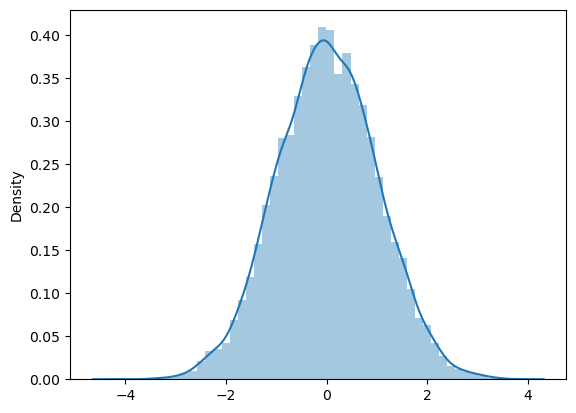

In [116]:
sns.distplot(normal_population)

In [117]:
# generate 100 random sample with replacement from normal population

<AxesSubplot:ylabel='Density'>

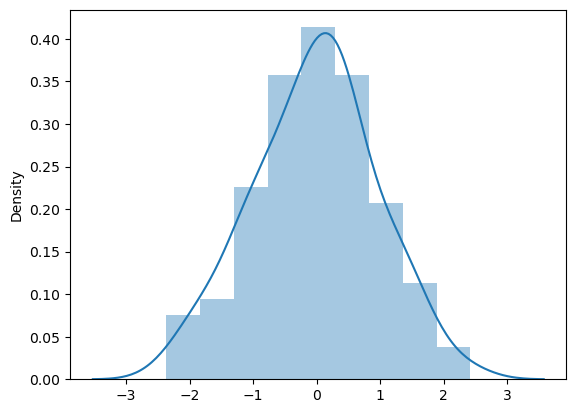

In [122]:
sample_distribution=random.choices(normal_population,k=100)
sns.distplot(sample_distribution)

In [124]:
pd.DataFrame(sample_distribution).skew()

0   -0.073686
dtype: float64

# SAMPLING DISTRIBUTION

<AxesSubplot:ylabel='Density'>

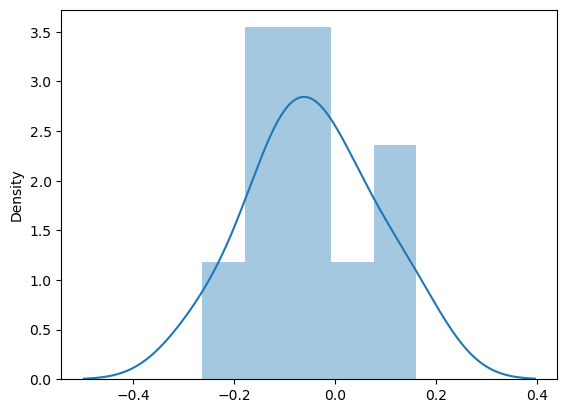

In [126]:
no_of_sample=10
sample_size=50
sample_meanlist=[]
for i in range(no_of_sample):
    sample=random.choices(normal_population,k=sample_size)
    sample_meanlist.append(pd.Series(sample).mean())
    
sns.distplot(sample_meanlist)

In [127]:
pd.DataFrame(sample_meanlist).skew()

0    0.027165
dtype: float64

<AxesSubplot:ylabel='Density'>

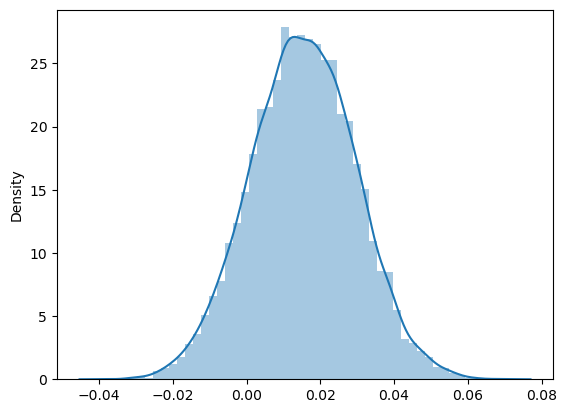

In [129]:
no_of_sample=10000
sample_size=5000
sample_meanlist=[]
for i in range(no_of_sample):
    sample=random.choices(normal_population,k=sample_size)
    sample_meanlist.append(pd.Series(sample).mean())
    
sns.distplot(sample_meanlist)

In [130]:
pd.DataFrame(sample_meanlist).skew()

0   -0.002699
dtype: float64

# RIGHT SKEWED POPULATION

<AxesSubplot:ylabel='Density'>

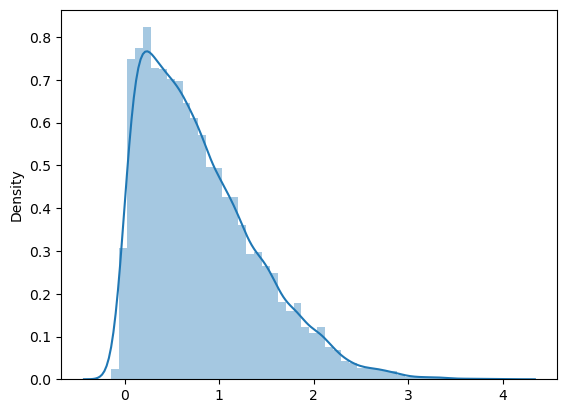

In [131]:
rskew_population=skewnorm.rvs(20,size=10000,random_state=1)
sns.distplot(rskew_population)

In [132]:
pd.DataFrame(rskew_population).skew()

0    0.993634
dtype: float64

<AxesSubplot:ylabel='Density'>

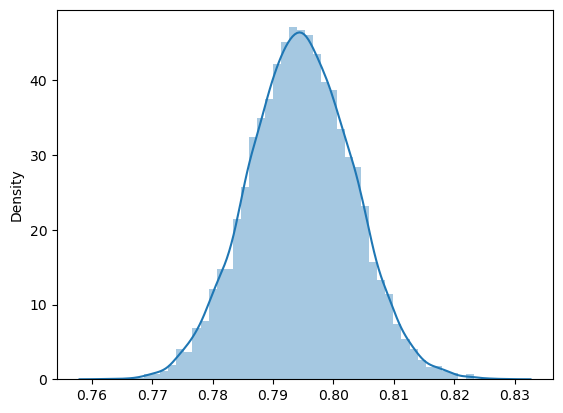

In [133]:
no_of_sample=10000
sample_size=5000
sample_meanlist=[]
for i in range(no_of_sample):
    sample=random.choices(rskew_population,k=sample_size)
    sample_meanlist.append(pd.Series(sample).mean())
    
sns.distplot(sample_meanlist)

In [135]:
pd.DataFrame(sample_meanlist).skew()

0    0.021283
dtype: float64

In [3]:
left_skew= skewnorm.rvs(-20,size=10000,random_state=1)

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

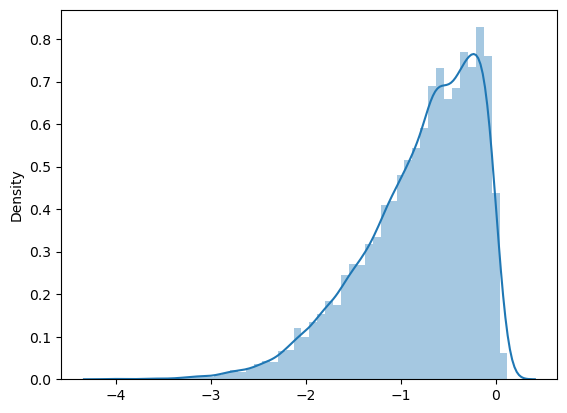

In [4]:
sns.distplot(left_skew)